In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import os, time, cv2
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.compat.v1.keras import backend as kerasb
import numpy as np

In [4]:
def accuracy_function(y_true, y_pred):
  return kerasb.mean(kerasb.equal(kerasb.round(y_true), kerasb.round(y_pred)))

In [5]:
model_path = '/content/drive/MyDrive/monocular-depth-estimation-with-densenet/model/model.h5'

In [6]:
model = tf.keras.models.load_model(model_path, {'accuracy_function':accuracy_function}, compile=False)

In [7]:
def preprocess_original_image(image):
  processed = []
  resized_original_img = cv2.resize(image,(640, 480)).astype(np.float32)
  scaled_original_img = (resized_original_img - resized_original_img.min()) / (resized_original_img.max() - resized_original_img.min()) 
  processed.append(scaled_original_img)
  return np.array(processed)

Image size:  2667 x 4000


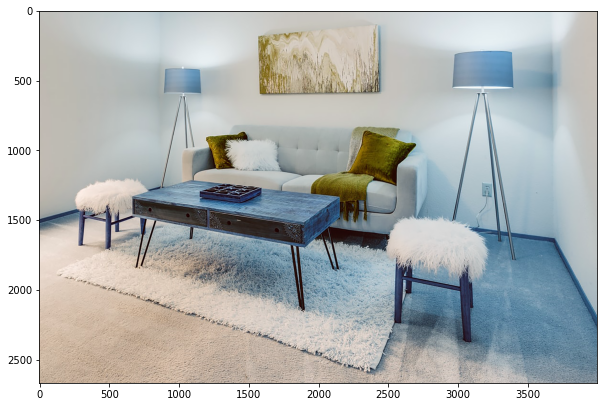

In [9]:
image_path = '/content/drive/MyDrive/monocular-depth-estimation-with-densenet/test_images/room_4000x2667.png'
image = cv2.imread(image_path)
plt.figure(figsize=(10, 10))
plt.imshow(image)
height, width = image.shape[0], image.shape[1]
print('Image size: ', height, 'x', width)
image_np = preprocess_original_image(image)

In [24]:
start = time.time()
depth_predictions = model.predict(image_np)
end = time.time()
print(end-start)

0.09365606307983398


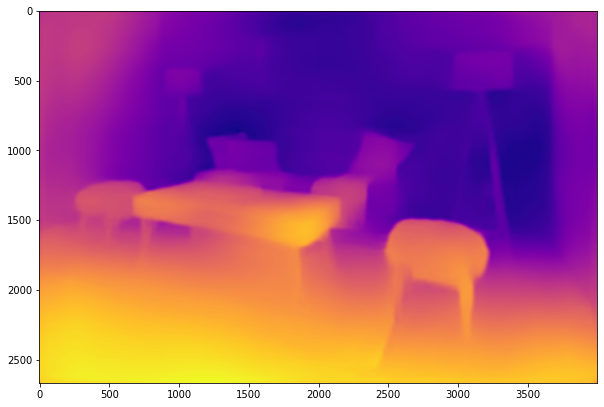

In [28]:
depth_image = cv2.resize(depth_predictions[0].squeeze(-1), dsize=(width, height))
plt.figure(figsize=(10, 10))
plt.imshow(depth_image, cmap ='plasma_r')

In [27]:
start = time.time()
depth_predictions = model.predict(image_np)
depth_image = cv2.resize(depth_predictions[0].squeeze(-1), dsize=(width, height))
end = time.time()
print(end-start)

0.09817123413085938
